In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

# 1

In [2]:
data = pd.read_csv(r"C:\Users\Rohit Srivastava\OneDrive\Desktop\Datasets\train.csv")

In [3]:
# Organize pixel values by class
pixel_values_by_class = [data[data['label'] == class_num].iloc[:, 1:].values for class_num in range(10)]

In [4]:
# Define the class pairs
class_pairs = [(0, 1), (0, 9), (1, 9), (3, 5), (4, 6), (8, 9)]

In [5]:
# Define a function to calculate Fisher Discriminant for a pair of classes
def calculate_fisher(class_a, class_b, pixel_values):
    mean_a = np.mean(pixel_values[class_a], axis=0)
    mean_b = np.mean(pixel_values[class_b], axis=0)
    var_a = np.var(pixel_values[class_a], axis=0)
    var_b = np.var(pixel_values[class_b], axis=0)
    fisher = np.where(var_a + var_b == 0, 0, ((mean_a - mean_b) ** 2) / (var_a + var_b))
    return fisher

In [6]:
# Normalize Fisher Discriminant values to [0, 1]
def normalize_fisher(fisher):
    min_val = np.min(fisher)
    max_val = np.max(fisher)
    normalized_fisher = (fisher - min_val) / (max_val - min_val)
    return normalized_fisher

C:\Users\Rohit Srivastava\AppData\Local\Temp\ipykernel_18484\1654784464.py:7: RuntimeWarning: invalid value encountered in divide
  fisher = np.where(var_a + var_b == 0, 0, ((mean_a - mean_b) ** 2) / (var_a + var_b))


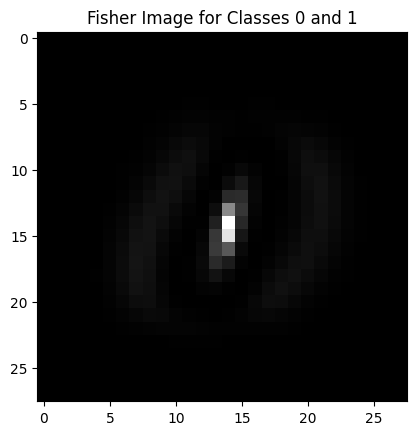

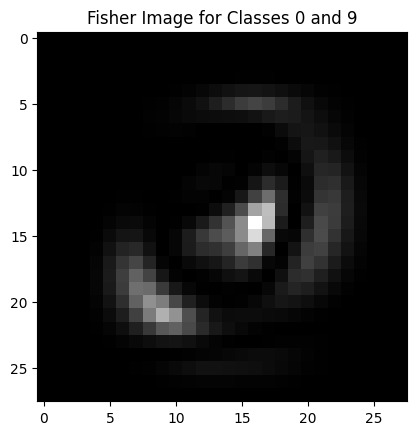

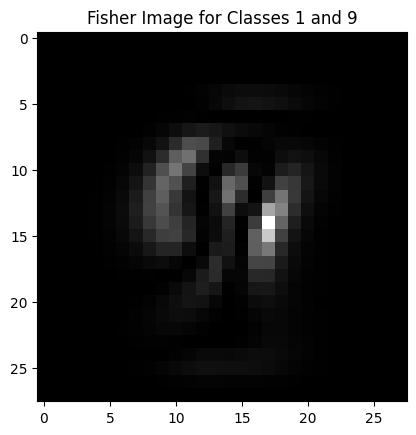

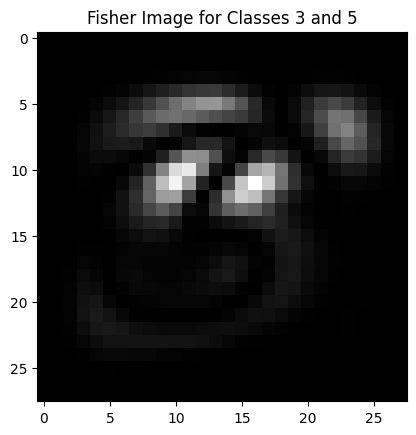

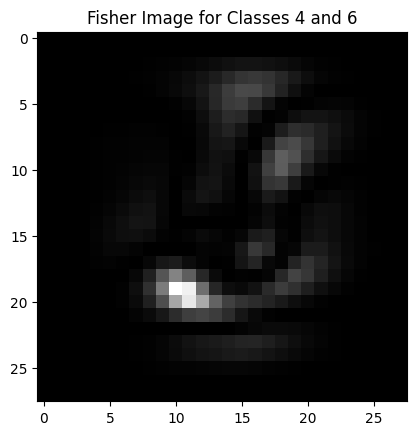

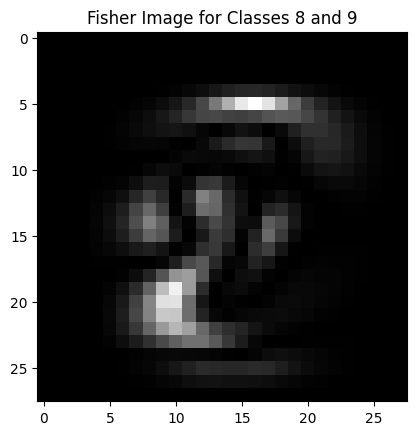

In [7]:
# Iterate through pairs of classes and compute normalized Fisher Discriminants
for class_a, class_b in class_pairs:
    fisher_values = calculate_fisher(class_a, class_b, pixel_values_by_class)
    normalized_fisher_values = normalize_fisher(fisher_values)

    # Reshape normalized_fisher_values into a 28x28 image for visualization
    fisher_image = normalized_fisher_values.reshape(28, 28)

    # Plot the Fisher image
    plt.imshow(fisher_image, cmap='gray')
    plt.title(f"Fisher Image for Classes {class_a} and {class_b}")
    plt.show()

# 2

In [8]:
# Load the dataset
data = pd.read_csv(r"C:\Users\Rohit Srivastava\OneDrive\Desktop\Datasets\mushrooms.csv")

In [9]:
# One-hot encode the categorical variables
encoder = OneHotEncoder(handle_unknown='ignore')
X = encoder.fit_transform(data.drop('class', axis=1))
y = data['class'].map({'p': 0, 'e': 1})

In [10]:
# Divide it randomly into 65% training and 35% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0)

In [11]:
# Define the hyper-parameter combinations
purity_measures = ['entropy']
max_depths = [1, 2, 3, 4, 5, 6, 7]
purity_thresholds = [0.6, 0.7, 0.8, 0.9]

In [12]:
# Create a DataFrame to store the results
results = pd.DataFrame(index=max_depths, columns=purity_thresholds)

In [13]:
# Perform the parameter sweep
for purity_measure in purity_measures:
    for max_depth in max_depths:
        for purity_threshold in purity_thresholds:
            # Build a Decision Tree classifier with the current hyper-parameter combination
            clf = DecisionTreeClassifier(criterion=purity_measure, max_depth=max_depth)
            clf.fit(X_train, y_train)

            # Compute the training and test accuracy
            y_train_pred = clf.predict(X_train)
            train_acc = accuracy_score(y_train, y_train_pred)
            y_test_pred = clf.predict(X_test)
            test_acc = accuracy_score(y_test, y_test_pred)

            # Write the "Training" and "Test" accuracy in the corresponding cell of the table
            results.loc[max_depth, purity_threshold] = (train_acc, test_acc)

In [14]:
# Print the results
print(results)

                                        0.6  \
1    (0.890719696969697, 0.879395218002813)   
2  (0.9240530303030303, 0.9328410689170182)   
3  (0.9630681818181818, 0.9588607594936709)   
4  (0.9888257575757575, 0.9855836849507735)   
5   (0.9994318181818181, 0.999648382559775)   
6                                (1.0, 1.0)   
7                                (1.0, 1.0)   

                                        0.7  \
1    (0.890719696969697, 0.879395218002813)   
2  (0.9240530303030303, 0.9328410689170182)   
3  (0.9630681818181818, 0.9588607594936709)   
4  (0.9888257575757575, 0.9855836849507735)   
5   (0.9994318181818181, 0.999648382559775)   
6                                (1.0, 1.0)   
7                                (1.0, 1.0)   

                                        0.8  \
1    (0.890719696969697, 0.879395218002813)   
2  (0.9240530303030303, 0.9328410689170182)   
3  (0.9630681818181818, 0.9588607594936709)   
4  (0.9888257575757575, 0.9855836849507735)   
5   (0.9994

In [15]:
# Find the best parameter combination
best_params_indices = np.unravel_index(results.values.argmax(), results.shape)
best_params_depth, best_params_threshold = best_params_indices
best_purity_measure = purity_measures[0] 

In [16]:
print(f'Best parameter combination: Purity Measure={best_purity_measure}, Maximum Depth={max_depths[best_params_depth]}, Purity Threshold={purity_thresholds[best_params_threshold]}')

Best parameter combination: Purity Measure=entropy, Maximum Depth=6, Purity Threshold=0.6


In [17]:
# Draw the decision tree with the best parameters
best_clf = DecisionTreeClassifier(criterion=best_purity_measure, max_depth=max_depths[best_params_depth])
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

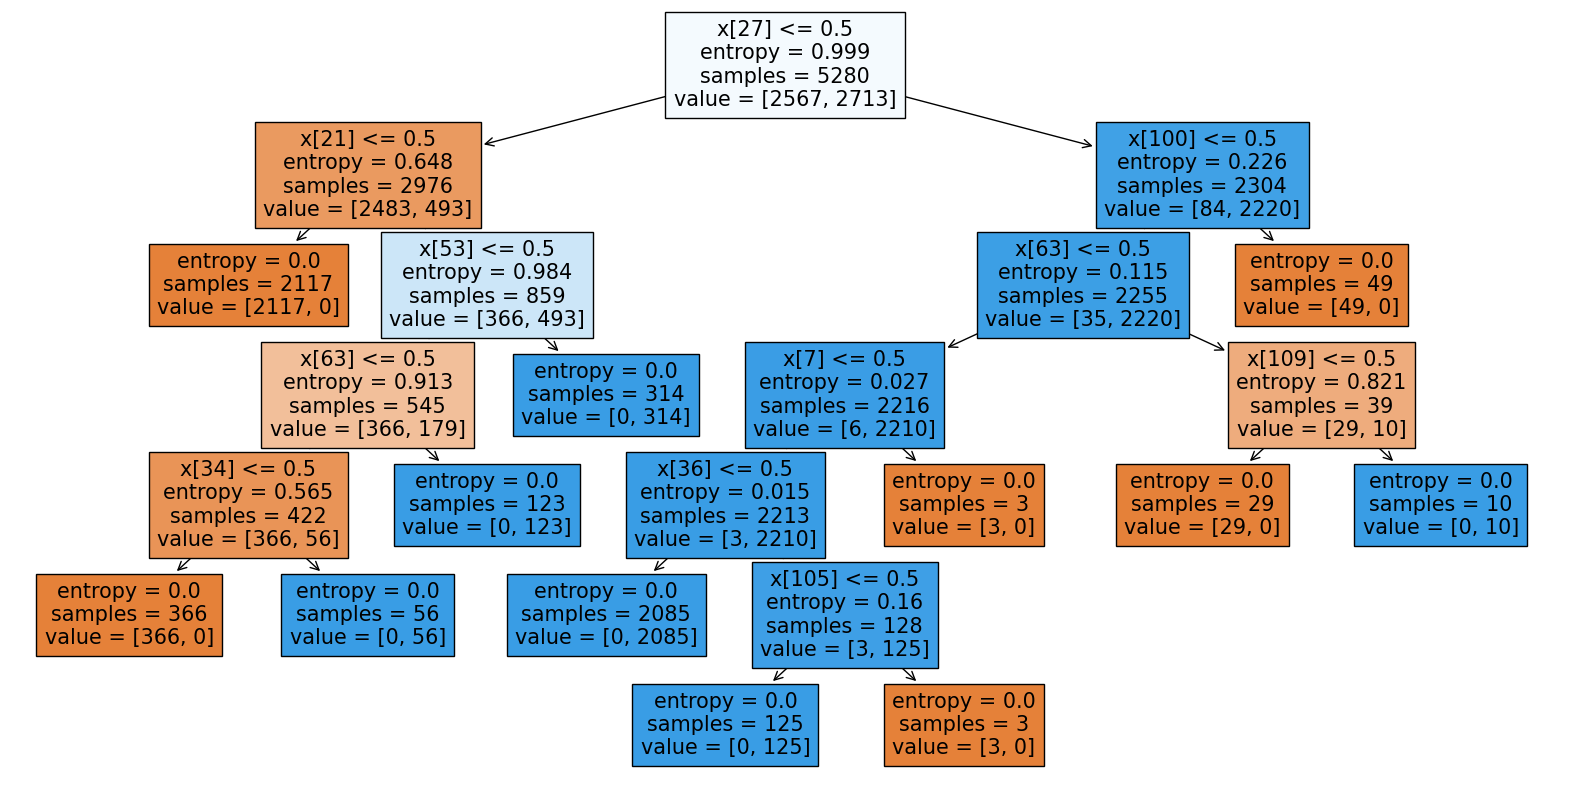

In [18]:
plt.figure(figsize=(20, 10))
plot_tree(best_clf, filled=True)
plt.show()

In [19]:
# Rules learnt by the decision tree
rules = best_clf.tree_.decision_path(X_train.astype(np.float32)) 
print(rules)

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 0)	1
  (2, 10)	1
  (2, 11)	1
  (2, 12)	1
  (2, 13)	1
  (2, 14)	1
  (3, 0)	1
  (3, 10)	1
  (3, 11)	1
  (3, 12)	1
  (3, 13)	1
  (3, 14)	1
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1
  (5, 0)	1
  (5, 10)	1
  (5, 11)	1
  (5, 12)	1
  :	:
  (5275, 11)	1
  (5275, 12)	1
  (5275, 13)	1
  (5275, 14)	1
  (5276, 0)	1
  (5276, 1)	1
  (5276, 2)	1
  (5277, 0)	1
  (5277, 10)	1
  (5277, 11)	1
  (5277, 12)	1
  (5277, 13)	1
  (5277, 14)	1
  (5278, 0)	1
  (5278, 10)	1
  (5278, 11)	1
  (5278, 12)	1
  (5278, 13)	1
  (5278, 14)	1
  (5279, 0)	1
  (5279, 10)	1
  (5279, 11)	1
  (5279, 12)	1
  (5279, 13)	1
  (5279, 14)	1


# 3

In [20]:
data = pd.read_csv(r"C:\Users\Rohit Srivastava\OneDrive\Desktop\Datasets\train.csv")

In [21]:
# Divide it randomly into 65% training and 35% test data
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0)

In [22]:
# Define the hyper-parameter combinations
K_values = [1, 3, 5, 7, 9, 11, 13, 15]

In [23]:
# Perform the parameter sweep
train_accs = []
test_accs = []
for K in K_values:
    # Build a k-NN classifier with the current hyper-parameter combination
    clf = KNeighborsClassifier(n_neighbors=K)
    clf.fit(X_train, y_train)
    
    # Compute the training and test accuracy
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accs.append(train_acc)
    y_test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_accs.append(test_acc)

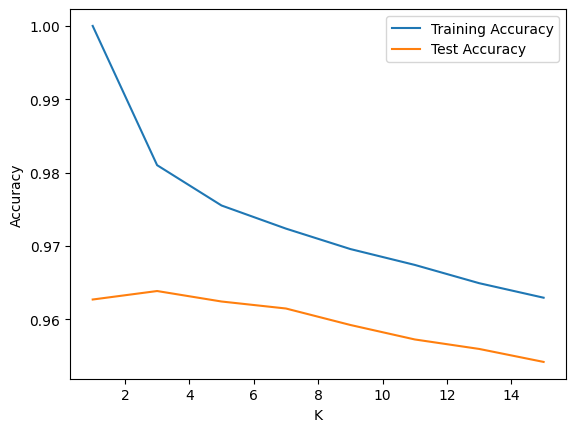

In [24]:
# Plot the training and test accuracies for each K
plt.plot(K_values, train_accs, label='Training Accuracy')
plt.plot(K_values, test_accs, label='Test Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
# Find the optimal K for this task
best_K = K_values[test_accs.index(max(test_accs))]
print(f'Optimal K: {best_K}')

Optimal K: 3


# 4

In [26]:
data = pd.read_csv(r"C:\Users\Rohit Srivastava\OneDrive\Desktop\Datasets\train.csv")

In [27]:
# Divide the data into features (X) and target (y)
X = data.drop('label', axis=1)
y = data['label']

In [28]:
# Perform PCA on the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [29]:
# Perform Fisher Discriminant Analysis on the data
fisher = LinearDiscriminantAnalysis(n_components=2)
X_fisher = fisher.fit_transform(X, y)

In [30]:
# Divide the data into training and test sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.35, random_state=0)
X_train_fisher, X_test_fisher, y_train_fisher, y_test_fisher = train_test_split(X_fisher, y, test_size=0.35, random_state=0)

In [31]:
# Build a Decision Tree classifier with depth 5, purity threshold 0.8 on both datasets
clf_pca = DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.8)
clf_pca.fit(X_train_pca, y_train_pca)

DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.8)

In [32]:
clf_fisher = DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.8)
clf_fisher.fit(X_train_fisher, y_train_fisher)

DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.8)

In [33]:
# Build a k-NN classifier with k = 5 on both datasets
clf_knn_pca = KNeighborsClassifier(n_neighbors=5)
clf_knn_pca.fit(X_train_pca, y_train_pca)

KNeighborsClassifier()

In [34]:
clf_knn_fisher = KNeighborsClassifier(n_neighbors=5)
clf_knn_fisher.fit(X_train_fisher, y_train_fisher)

KNeighborsClassifier()

In [35]:
# Build a Logistic Regression classifier between any pair of classes (say 0 vs 3, 4 vs 9) on the PCA dataset
clf_logreg_03 = LogisticRegression()
clf_logreg_03.fit(X_train_pca[(y_train_pca == 0) | (y_train_pca == 3)], y_train_pca[(y_train_pca == 0) | (y_train_pca == 3)])

LogisticRegression()

In [36]:
clf_logreg_49 = LogisticRegression()
clf_logreg_49.fit(X_train_pca[(y_train_pca == 4) | (y_train_pca == 9)], y_train_pca[(y_train_pca == 4) | (y_train_pca == 9)])

LogisticRegression()

In [37]:
# Calculate the train and test accuracy for each classifier
train_acc_pca = accuracy_score(y_train_pca, clf_pca.predict(X_train_pca))
test_acc_pca = accuracy_score(y_test_pca, clf_pca.predict(X_test_pca))

In [38]:
train_acc_fisher = accuracy_score(y_train_fisher, clf_fisher.predict(X_train_fisher))
test_acc_fisher = accuracy_score(y_test_fisher, clf_fisher.predict(X_test_fisher))

In [39]:
train_acc_knn_pca = accuracy_score(y_train_pca, clf_knn_pca.predict(X_train_pca))
test_acc_knn_pca = accuracy_score(y_test_pca, clf_knn_pca.predict(X_test_pca))

In [40]:
train_acc_knn_fisher = accuracy_score(y_train_fisher, clf_knn_fisher.predict(X_train_fisher))
test_acc_knn_fisher = accuracy_score(y_test_fisher, clf_knn_fisher.predict(X_test_fisher))

In [41]:
train_acc_logreg_03_pca = accuracy_score(y_train_pca[(y_train_pca == 0) | (y_train_pca == 3)], clf_logreg_03.predict(X_train_pca[(y_train_pca == 0) | (y_train_pca == 3)]))
test_acc_logreg_03_pca = accuracy_score(y_test_pca[(y_test_pca == 0) | (y_test_pca == 3)], clf_logreg_03.predict(X_test_pca[(y_test_pca == 0) | (y_test_pca == 3)]))

In [42]:
train_acc_logreg_49_pca = accuracy_score(y_train_pca[(y_train_pca == 4) | (y_train_pca == 9)], clf_logreg_49.predict(X_train_pca[(y_train_pca == 4) | (y_train_pca == 9)]))
test_acc_logreg_49_pca = accuracy_score(y_test_pca[(y_test_pca == 4) | (y_test_pca == 9)], clf_logreg_49.predict(X_test_pca[(y_test_pca == 4) | (y_test_pca == 9)]))

In [43]:
# Print the results
print("Train Accuracy | Test Accuracy")
print("Digits-PCA-Tree |", train_acc_pca, ",", test_acc_pca)
print("Digits-Fisher-Tree |", train_acc_fisher, ",", test_acc_fisher)
print("Digits-PCA-kNN |", train_acc_knn_pca, ",", test_acc_knn_pca)
print("Digits-Fisher-kNN |", train_acc_knn_fisher, ",", test_acc_knn_fisher)
print("Digits-PCA-Logistic-Regression (0 vs 3) |", train_acc_logreg_03_pca, ",", test_acc_logreg_03_pca)
print("Digits-PCA-Logistic-Regression (4 vs 9) |", train_acc_logreg_49_pca, ",", test_acc_logreg_49_pca)

Train Accuracy | Test Accuracy
Digits-PCA-Tree | 0.11084249084249084 , 0.1127891156462585
Digits-Fisher-Tree | 0.11084249084249084 , 0.1127891156462585
Digits-PCA-kNN | 0.5844322344322345 , 0.4216326530612245
Digits-Fisher-kNN | 0.6570695970695971 , 0.5126530612244898
Digits-PCA-Logistic-Regression (0 vs 3) | 0.9225747960108794 , 0.918800539083558
Digits-PCA-Logistic-Regression (4 vs 9) | 0.5670979667282809 , 0.5652631578947368


1. **Decision Tree Classifier (Supervised - PCA vs. Fisher):**
   In the context of the Decision Tree classifier, both supervised techniques, PCA and Fisher, yielded very similar and low accuracy scores on both training and test sets. This suggests that neither method effectively captured the discriminative patterns required by the classifier. In this case, the performance of both PCA and Fisher could be limited by the relatively simple nature of the Decision Tree algorithm, which doesn't take full advantage of the supervised information in the labels.

2. **k-Nearest Neighbors (k-NN) Classifier (Supervised - PCA vs. Fisher):**
   The k-NN classifier demonstrated that Fisher, a supervised dimensionality reduction technique, outperformed PCA in terms of accuracy. This indicates that Fisher's ability to incorporate class label information during projection was beneficial for preserving local relationships, which is a critical aspect of k-NN. In contrast, PCA, being unsupervised, might not fully capture the class-specific information required for k-NN to function optimally.

3. **Logistic Regression Classifier (Supervised - PCA vs. Fisher) - Class (0 vs 3) and (4 vs 9):**
   The results of Logistic Regression reinforced the advantage of PCA in scenarios where supervised linear classification is relevant. PCA, by capturing the maximum variance in the data, is better suited for cases where the separation between classes can be effectively modeled using linear decision boundaries. Fisher, while supervised, might not have exhibited the same level of success in this context, potentially due to the intricacies of the logistic regression algorithm.

Incorporating the supervised and unsupervised aspects into the analysis, it becomes evident that the choice between PCA and Fisher depends not only on the specific classification algorithm and class pairs but also on the availability and relevance of class label information. Supervised techniques like Fisher can excel when the class-specific information is crucial for the classifier's operation, while unsupervised techniques like PCA might shine when capturing the intrinsic structure and variance of the data is the primary concern, especially in linear classification scenarios.